In [13]:
from scipy.optimize import curve_fit
import matplotlib.pylab as plt
import numpy as np

In [14]:
def func(x, a, b):
    return a * x + b 

x_data = [1.33684,1.3479,1.3479,1.4536,1.4702,1.4315,1.4085,1.4028,1.4116]
A_2f = [1936.3,1936.8 , 1930.1,2094,2106.7,2110.8,2025.7,2033.5,2033.4]
#H_2f = [0.0112, 0.0201, 0.0297, 0.0394]
y_spread = [30, 30, 30, 30, 30, 30, 30, 30, 30]

# averages and dispersion of data
#y_means = np.array(y_data).mean(axis = 1)
#y_spread = np.array(y_data).std(axis = 1)

best_fit_ab, covar = curve_fit(func, x_data, A_2f,
                               sigma = y_spread,
                               absolute_sigma = True)
sigma_ab = np.sqrt(np.diagonal(covar))

#best_fit_ab2, covar2 = curve_fit(func, x_data, H_2f,
#                               sigma = y_spread,
#                               absolute_sigma = True)
#sigma_ab2 = np.sqrt(np.diagonal(covar2))

In [15]:
from uncertainties import ufloat
a = ufloat(best_fit_ab[0], sigma_ab[0])
b = ufloat(best_fit_ab[1], sigma_ab[1])
text_res = "Best-fit (linear) parameters: \na = {}\nb = {}".format(a, b)
print(text_res)

#a2 = ufloat(best_fit_ab2[0], sigma_ab2[0])
#b2 = ufloat(best_fit_ab2[1], sigma_ab2[1])
#text_res2 = "Best-fit (linear) parameters: \na = {}\nb = {}".format(a2, b2)
#print(text_res2)

Best-fit (linear) parameters: 
a = (1.49+/-0.22)e+03
b = (-0.6+/-3.1)e+02


In [16]:
# plotting the unaveraged data
#flier_kwargs = dict(marker = 'o', markerfacecolor = 'silver',
#                    markersize = 3, alpha=0.7)
#line_kwargs = dict(color = 'k', linewidth = 1)

#bp = plt.boxplot(y_data, positions = x_data,
#                 capprops = line_kwargs,
#                 boxprops = line_kwargs,
#                 whiskerprops = line_kwargs,
#                 medianprops = line_kwargs,
#                 flierprops = flier_kwargs,
#                 widths = 5,
#                 manage_ticks = False)

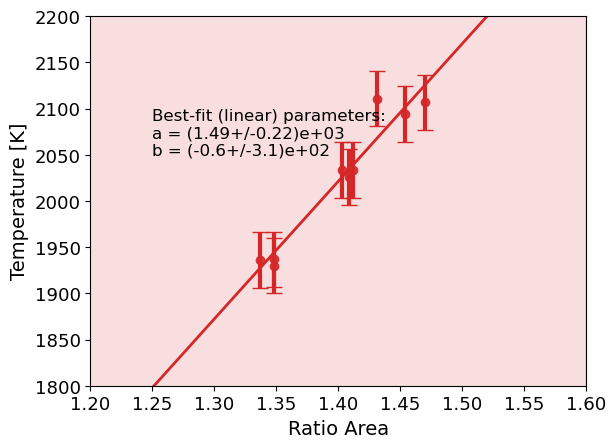

In [29]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ratio Area', fontsize=14)
ax1.set_ylabel('Temperature [K]', color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor=color)

ax1.errorbar(x_data, A_2f, y_spread, fmt='none', linewidth=3, capsize=6, ecolor='tab:red')
ax1.scatter(x_data, A_2f, marker='o', facecolor='tab:red', alpha=0.9)

hires_x = np.linspace(1.2, 1.6, 100)
ax1.plot(hires_x, func(hires_x, *best_fit_ab), 'tab:red', linewidth=2)

# Banda di confidenza grigia (oppure commenta se non la vuoi)
bound_upper = func(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = func(hires_x, *(best_fit_ab - sigma_ab))
ax1.fill_between(hires_x, bound_lower, bound_upper, color='tab:red', alpha=0.15)

ax1.tick_params(axis='y', which='major', labelsize=13, colors='black')
ax1.tick_params(axis='x', which='major', labelsize=13)

plt.xlim(1.2, 1.6)      
plt.ylim(1800, 2200)    

plt.text(1.25, 2050, text_res, color='black', fontsize=12)
#plt.text(1.5, 2150, "(a)", fontsize=24)

plt.savefig("best-fit_unc_A.png", dpi=600, bbox_inches='tight')
plt.savefig("best-fit_unc_A.pdf", dpi=600, bbox_inches='tight')
plt.show()